## Исследование российского кинопроката



### О проекте:
    
#### Заказчик исследования — Министерство культуры Российской Федерации
  
    
Информация с портала открытых данных Министерства культуры. Набор данных содержит сведения о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
    
    
Необходимио изучить рынок российского кинопроката и выявить текущие тренды. Внимание фильмам, которые получили государственную поддержку. 

Ответить на вопрос, насколько такие фильмы интересны зрителю?

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


from scipy.stats import ttest_ind
from datetime import datetime

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

<div class="alert alert-info"> 
    
Импортируем библиотеки и откроем файлы.


</div>

In [4]:
try:
    mk = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    mk = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [5]:
mk.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
try:
    rental = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    rental = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [7]:
rental.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [8]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


<div class="alert alert-info"> 
    
В двух датафреймах есть одинаковые колонки - **puNumber.** Но в них разные типы данных, в одной - object, в другой - int64 


</div>

In [10]:
mk['puNumber'] = mk['puNumber'].replace('нет', '0')

In [11]:
mk['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [12]:
mk[~mk['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info"> 
    

В строке 804 есть символы с пробелом.


</div> 

In [13]:
mk.loc[804, 'puNumber'] = mk.loc[804, 'puNumber'].strip()

In [14]:
mk['puNumber'] = pd.to_numeric(mk['puNumber'])
mk['puNumber'].dtype

dtype('int64')

<div class="alert alert-info"> 
    

Приведём тип данных к **int64**.


</div> 

In [15]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [16]:
df = mk.merge(rental, how='left')
del mk

In [17]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-info"> 
    
Объединим 2 таблицы в одну, по столбцу - puNumber 


</div>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [20]:
raitings_str = df[df['ratings'].str.contains('[^0-9.]').fillna(False)]
raitings_str

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29T12:00:00.000Z,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13T12:00:00.000Z,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27T12:00:00.000Z,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02T12:00:00.000Z,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


<div class="alert alert-info"> 
    
Проверим столбец **ratings.** В нём есть значения в формате процентов.
    
Перепишем проценты, как доли от 10 баллов, затем приведём их к числу. Убедимся, что предельные значения находятся в диапазоне от 1 до 10.


</div>

In [21]:
df.loc[raitings_str.index, 'ratings'] = raitings_str['ratings'].str[0] + '.' + raitings_str['ratings'].str[1]

df['ratings'] = pd.to_numeric(df['ratings'])

df['ratings'].describe()[['min', 'max']]

min   1.00
max   9.90
Name: ratings, dtype: float64

In [22]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [23]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

df['show_start_date'].dtype

dtype('<M8[ns]')

<div class="alert alert-info"> 
    
 Приведём дату и время в столбце **show_start_date** к читаемому фотмату

</div>

In [24]:
df['day_start_date'] = df['show_start_date'].dt.day_name()
df['month_start_date'] = df['show_start_date'].dt.month_name()
df['year_start_date'] = df['show_start_date'].dt.year

<div class="alert alert-info"> 
    
Добавим отдельные колонки с **днём, месяцем и годом** выхода кино


</div>

#### Шаг 2.2. Изучим пропуски в датафрейме

In [25]:
df.isnull().sum().sort_values()

title                       0
day_start_date              0
month_start_date            0
age_restriction             0
year_start_date             0
type                        0
show_start_date             0
puNumber                    0
production_country          2
director                    9
film_studio                18
producer                  568
ratings                   967
genres                    976
box_office               4328
nonrefundable_support    7154
budget                   7154
financing_source         7154
refundable_support       7154
dtype: int64

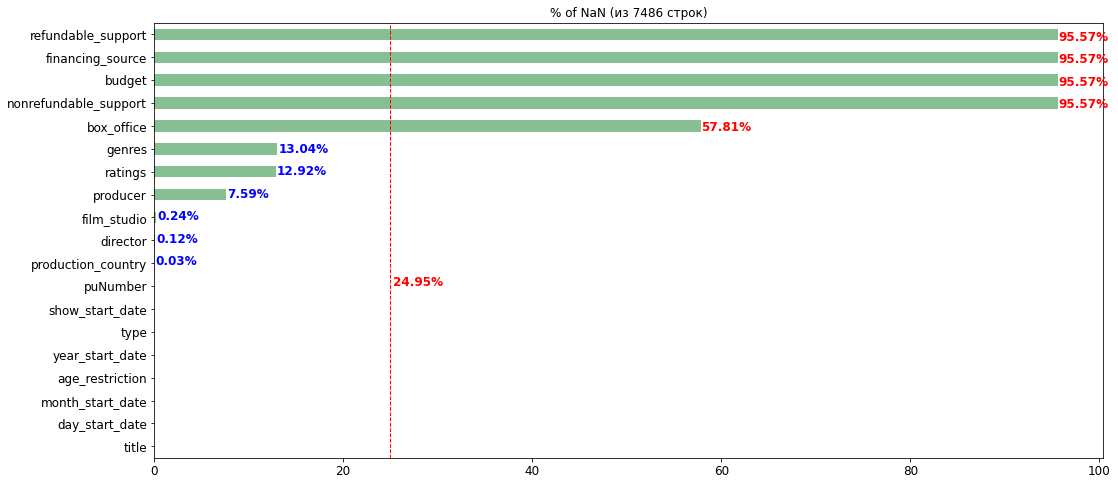

In [26]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из {} строк)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(df)

<div class="alert alert-info"> 
    
Большая часть пропусков в столбцах с финансовыми показателями. Они нам понадобятся, поэтому пока не трогаем эти данные, чтобы не было искажений в результатах анализа.


</div>

In [27]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [28]:
df_pass = df.isna()
df_pass.sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
day_start_date              0
month_start_date            0
year_start_date             0
dtype: int64

In [29]:
df_pass['year'] = df['show_start_date'].dt.year

df_pass['total_records'] = True

df_pass.groupby(by='year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


<div class="alert alert-info"> 
    
Пропуски в колонках **refundable_support, nonrefundable_support, budget, financing_source** в одних местах. Если речь об объёме государственной поддержки, то вероятно пропуски связаны со страной.
    
В столбце **box_office** кассовые сборы могут быть = 0, если фильм не вышел в прокат.


</div>



In [30]:
t = df.budget.isna().rename('is_na').to_frame()

t['is_rus'] = df.production_country.str.contains('Россия')

display(t.groupby(['is_na']).agg(['sum', 'count']).set_axis(['Россия', 'Всего'], axis=1))

del t

,Россия,Всего
is_na,,
False,332,332
True,1653,7152


<div class="alert alert-info"> 
    
Информация о государственной поддержке есть только по российским фильмам, но у большинства российских фильмов нет данных о господдержке. Возможно их снимали на деньги частных спонсоров.

Посмотрим, возможно ли заполнить пропуски в категориальных данных, взяв недостающую информацию в повторах названий фильмов.


</div>



In [31]:
def get_other_dir(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    
    in_movies = df.loc[df[column_name].isna(), 'title']
    
    return df[df['title'].isin(in_movies)].sort_values(by='title')

<div class="alert alert-info"> 
    
Посмотрим пропуски в стобце - **director**


</div>

In [32]:
get_other_dir(df, 'director')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN,Thursday,November,2010
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,April,2010
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,April,2011
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,June,2010
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,May,2010
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN,Monday,January,2010
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN,Friday,November,2011
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,September,2013
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00",Tuesday,December,2012


<div class="alert alert-info"> 
    
Пропусков не много, на результат они повлияют мало.


</div>

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [33]:
df.nunique().sort_values()

financing_source            3
age_restriction             5
day_start_date              7
type                        8
year_start_date            10
month_start_date           12
refundable_support         34
nonrefundable_support      75
ratings                    84
budget                    290
genres                    742
production_country        950
show_start_date          1965
box_office               2938
director                 4811
producer                 5349
film_studio              5490
title                    6772
puNumber                 7484
dtype: int64

<div class="alert alert-info"> 
    
Повторы в title объясняются тем, что один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.


</div>



In [34]:
df.loc[df['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.00,"мелодрама,комедия",NaN,Friday,December,2010
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN,Thursday,November,2013
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN,Monday,May,2016
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,November,2018
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,November,2018


<div class="alert alert-info"> 
    
Номер прокатного удостоверенияpu **Number** должен быть уникальным. Но под одним номером видим два разных фильма с одной датой премьеры. Возможна ошибка при заполнении формы. Оставим как есть.


</div>

In [35]:
df.loc[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN,Friday,December,2010
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN,Friday,December,2010
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN,Tuesday,May,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN,Tuesday,May,2010


<div class="alert alert-info"> 
    
Повтор **show_start_date**. Показ нескольких фильмов в одну дату возможен.


</div>

In [36]:
df['production_country'].tail()

7481             Великобритания
7482                        США
7483               США - Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object

<div class="alert alert-info"> 
    
Уберем возможно лишние пробелы между списками внутри ячейки. 


</div>

In [37]:
df['production_country'] = df['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))
df['production_country'].tail()

7481             Великобритания
7482                        США
7483                США, Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object

In [38]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres']:
    
    print('уникальные значения в', column)
    print('   было', df[column].nunique())
    
    df[column] = df[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
   было 4811
  стало 4800

уникальные значения в producer
   было 5349
  стало 5333

уникальные значения в film_studio
   было 5490
  стало 5461

уникальные значения в production_country
   было 813
  стало 812

уникальные значения в genres
   было 742
  стало 742



#### Шаг 2.4. Изучим категориальные значения

In [39]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [40]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<div class="alert alert-info"> 
    
В поле **type** есть значения с пробелом в начале строки. Метод .str.strip удаляет все пробелы в начале и в конце строки.


</div>



In [41]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [42]:
df['film_studio'] = df['film_studio'].str.strip()
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [43]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [44]:
df['age_restriction'] = df['age_restriction'].str.strip()
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [45]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

<div class="alert alert-info"> 
    
Другие категориальные переменные выглядят нормально


</div>

In [46]:
df['director'] = df['director'].str.strip()
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

</div>

<div class="alert alert-info", style="border: 3px solid purple; padding: 15px">

Режиссёр указан не одинаково. Используется как полное имя, так и инициал.

</div>

In [47]:
df['producer'] = df['producer'].str.strip()
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

</div>

<div class="alert alert-info", style="border: 3px solid purple; padding: 15px">
 
    
В столбце продюсеров также есть инициалы
</div>

In [48]:
df['genres'] = df['genres'].str.strip()
df['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', nan,
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, комедия, кр

</div>

<div class="alert alert-info", style="border: 3px solid purple; padding: 15px">

    
Наименования жанров дублируются в различных сочетаниях.
    
    
**Общая проблема** - дублирование имён и фамилий режиссёров и продюсеров в разных фильмах. Одни и те же люди могли работать над разными картинами. Жанры переплетаются и повторяются, так как один фильм сочетает несколько жанров. Большое количество уникальных значений и наличие перечислений усложнит анализ.
</div>

#### Шаг 2.5. Проверим количественные значения

In [49]:
bad_budget = df[df['budget'] < (df['nonrefundable_support'] + df['refundable_support'])]
bad_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",Friday,December,2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",Monday,January,2015
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40",Monday,September,2015
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия, фэнтези","67,418,974.80",Tuesday,May,2015
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40",Tuesday,July,2015
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия, драма","1,957,738.51",Monday,June,2015
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия, мелодрама","72,937,783.20",Wednesday,September,2015
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",Tuesday,March,2016
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия, мелодрама","70,299,052.00",Friday,April,2016
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",Friday,December,2016


Доля участия государства в бюджете составляет 0.6140376284219444



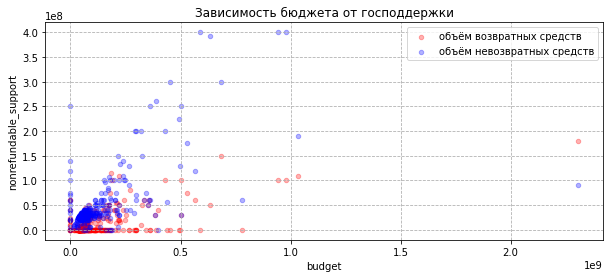

In [50]:
ax = df.plot.scatter(
    title='Зависимость бюджета от господдержки',
    label='объём возвратных средств',
    x='budget',
    y='refundable_support',
    color='r',
    alpha=0.3, figsize=(10, 4)
)

df.plot.scatter(
    label='объём невозвратных средств',
    x='budget', y='nonrefundable_support',
    color='b',
    alpha=0.3,
    ax=ax)

plt.grid(ls='--')

df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

support_percentage = df['support_percentage'].median()

print('Доля участия государства в бюджете составляет', support_percentage)
print()

<div class="alert alert-info"> 
    
Ряд фильмов получили поддержку государства, но в бюджете встречается и цифра 0. Выясним объём госфинансирования и заменим средним показателем. Суммируем оба вида господдержки. 


</div>

In [51]:
df.loc[bad_budget.index, 'budget'] = (df.loc[bad_budget.index, 'refundable_support']\
                                      + df.loc[bad_budget.index, 'nonrefundable_support'])\
                                      / support_percentage

df.loc[bad_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date,support_percentage
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,456,987.87","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",Friday,December,2014,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,142,351.75",Фонд кино,6.60,драма,"446,163,511.00",Monday,January,2015,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","130,285,175.20",Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40",Monday,September,2015,inf
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,571,293.80",Фонд кино,6.20,"комедия, фэнтези","67,418,974.80",Tuesday,May,2015,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","260,570,350.41",Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40",Tuesday,July,2015,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,085,316.71",Фонд кино,6.30,"комедия, драма","1,957,738.51",Monday,June,2015,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","56,999,764.15",Фонд кино,5.10,"комедия, мелодрама","72,937,783.20",Wednesday,September,2015,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,771,388.14",Министерство культуры,4.30,комедия,"15,362,931.43",Tuesday,March,2016,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","113,999,528.30",Фонд кино,6.30,"комедия, мелодрама","70,299,052.00",Friday,April,2016,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","407,141,172.51",Фонд кино,5.60,фантастика,"1,038,321,489.00",Friday,December,2016,inf


In [52]:
part_df = df[['nonrefundable_support', 'budget', 'refundable_support']]
part_df[part_df.notna().any(axis=1)]

,nonrefundable_support,budget,refundable_support
1281,"26,500,000.00","79,411,900.00",0.00
1448,"26,000,000.00","37,142,857.00",0.00
1498,"107,847,945.00","176,023,490.00",0.00
1524,"28,000,000.00","40,574,140.00",0.00
1792,"25,000,000.00","40,015,122.00",0.00
...,...,...,...
7464,"400,000,000.00","980,000,000.00","100,000,000.00"
7466,0.00,"190,000,000.00","100,000,000.00"
7474,"400,000,000.00","944,000,000.00","100,000,000.00"
7476,"30,000,000.00","46,154,000.00",0.00


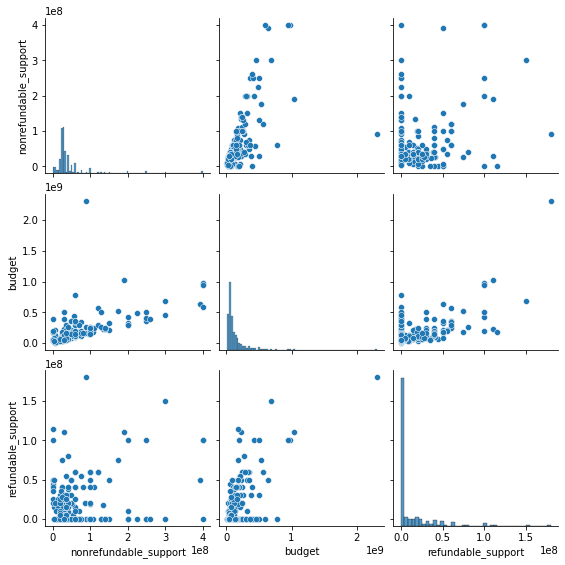

In [53]:
sns.pairplot(df[['nonrefundable_support', 'budget', 'refundable_support']])
plt.gcf().set_size_inches(8,8);


<div class="alert alert-info"> 
    
Всего 332 строки с полными финансовыми показателями фильмов.


</div>


In [54]:
part_df = df[['nonrefundable_support', 'budget', 'refundable_support', 'ratings', 'box_office']]
part_df[part_df.notna().any(axis=1)]

,nonrefundable_support,budget,refundable_support,ratings,box_office
0,NaN,NaN,NaN,7.20,NaN
1,NaN,NaN,NaN,6.60,NaN
2,NaN,NaN,NaN,6.80,NaN
3,NaN,NaN,NaN,6.80,NaN
4,NaN,NaN,NaN,6.80,NaN
...,...,...,...,...,...
7477,NaN,NaN,NaN,6.30,NaN
7478,"60,000,000.00","150,147,502.00","40,000,000.00",4.50,NaN
7480,NaN,NaN,NaN,NaN,"219,569.00"
7482,NaN,NaN,NaN,5.40,NaN


In [55]:
part_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nonrefundable_support  332 non-null    float64
 1   budget                 332 non-null    float64
 2   refundable_support     332 non-null    float64
 3   ratings                6519 non-null   float64
 4   box_office             3158 non-null   float64
dtypes: float64(5)
memory usage: 608.9 KB


In [56]:
part_df.describe()

,nonrefundable_support,budget,refundable_support,ratings,box_office
count,332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"48,980,988.89","134,057,765.84","11,864,457.83",6.49,"76,478,696.16"
std,"59,980,117.92","187,685,540.48","24,916,555.26",1.11,"240,353,122.82"
min,0.00,"9,771,388.14",0.00,1.00,0.00
25%,"25,000,000.00","46,153,971.75",0.00,5.90,"86,239.00"
50%,"30,000,000.00","74,592,550.00",0.00,6.60,"2,327,987.55"
75%,"40,375,000.00","150,002,143.25","15,000,000.00",7.20,"23,979,671.02"
max,"400,000,000.00","2,305,074,303.00","180,000,000.00",9.90,"3,073,568,690.79"


</div>

<div class="alert alert-info", style="border: 3px solid purple; padding: 15px">
 
    
У одного фильма может быть несколько прокатных удостоверений, поэтому данных о сборах больше.
    
</div>

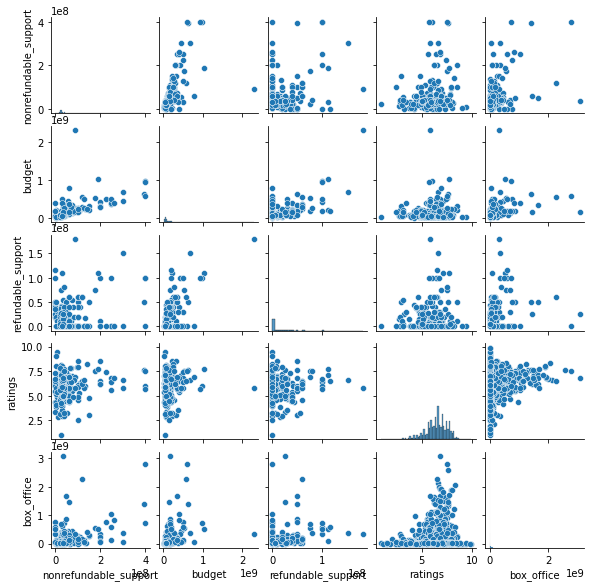

In [57]:
sns.pairplot(df[['nonrefundable_support', 'budget', 'refundable_support', 'ratings', 'box_office']])
plt.gcf().set_size_inches(8,8);

#### Шаг 2.6. Добавим новые столбцы

С именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [58]:
def add_main(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(', ')[0])
    return df

In [59]:
df_gen = add_main(df, ['director', 'genres']).head()
df_gen

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,day_start_date,month_start_date,year_start_date,support_percentage,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,Friday,November,2015,NaN,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма, военный",NaN,Tuesday,September,2016,NaN,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,Monday,October,2016,NaN,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,Friday,June,2016,NaN,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,Wednesday,July,2015,NaN,Тимур Бекмамбетов,фантастика


<div class="alert alert-info"> 
    
Доля участия государства в бюджете составляет - **61%**


</div>

### Шаг 3. Проведём исследовательский анализ данных

In [60]:
rental_per_yeart = df.loc[df['box_office'].notna(), ['year_start_date', 'box_office']] \
                .groupby('year_start_date') \
                .agg(['count', 'sum', 'mean', 'median'])

rental_per_yeart.columns = rental_per_yeart.columns.get_level_values(1)

Фильмы с данными о сборах: 0.42


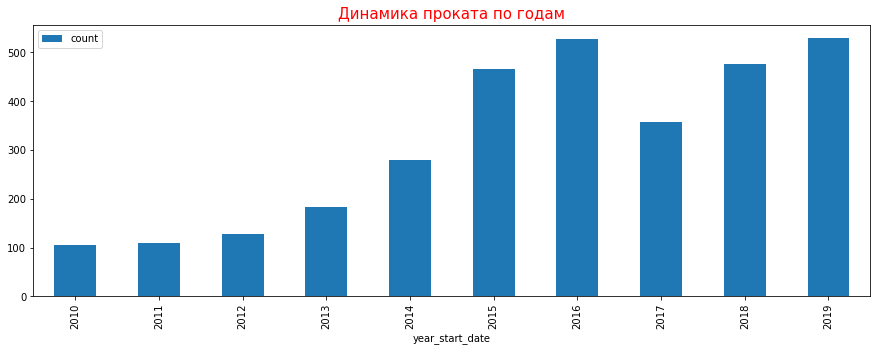

In [61]:
rental_per_yeart.plot(kind='bar', y='count', figsize=(15, 5))\
.set_title('Динамика проката по годам', fontsize = 15, color = 'red')

print(f'Фильмы с данными о сборах: {df.box_office.notna().mean():.2f}')

<div class="alert alert-info"> 
    
С 2010 года динамика проката идёт вверх по нарастающей. Пик приходится на 2016 год, затем спад и снова подъем в 2019 году до уровня 2016 года.


</div>

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


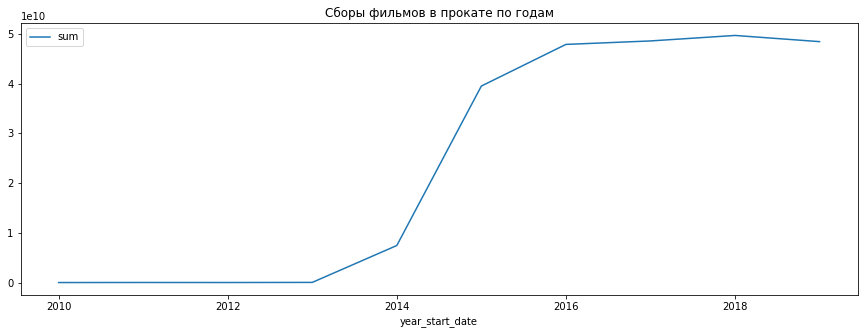

In [62]:
rental_per_yeart.plot(title='Сборы фильмов в прокате по годам', kind='line', y='sum', figsize=(15, 5))

print(f"В {rental_per_yeart['sum'].idxmin()} году сумма сборов была минимальной, в {rental_per_yeart['sum'].idxmax()} максимальной.")

<div class="alert alert-info"> 
    
Минимальной сумма сборов была в 2010-2013 годах, максимальной - в 2017 году.


</div>

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

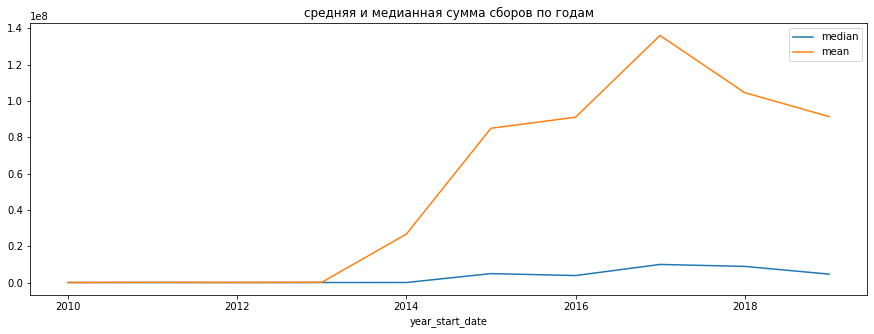

In [63]:
rental_per_yeart.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'], figsize=(15, 5))
print()

<div class="alert alert-info"> 
    
Среднее и медианное значения суммы сборов по годам подверждают пик сборов в 2017 году.


</div>

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [64]:
df.loc[(df['year_start_date'] >= 2015) & (df['year_start_date'] <= 2019)]\
    .groupby('age_restriction')['box_office'].agg(['mean', 'median'])

,mean,median
age_restriction,,
«0+» - для любой зрительской аудитории,"8,890,960.72","2,943,318.70"
«12+» - для детей старше 12 лет,"174,193,812.15","5,065,044.25"
«16+» - для детей старше 16 лет,"94,453,085.27","5,600,007.00"
«18+» - запрещено для детей,"51,464,161.08","6,154,439.17"
«6+» - для детей старше 6 лет,"176,020,854.26","13,736,207.98"


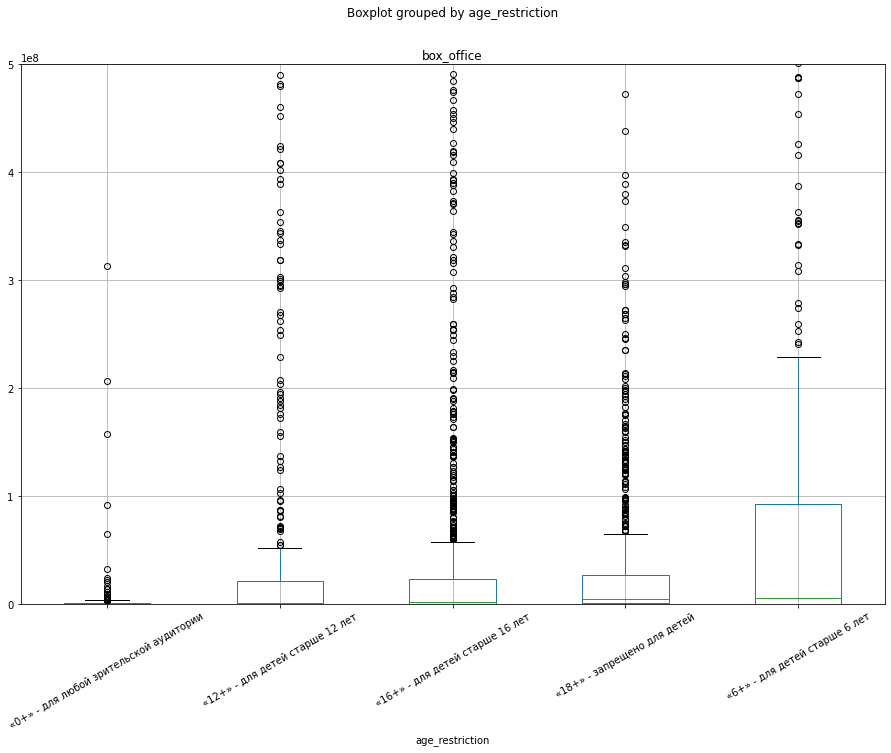

In [65]:
df.boxplot('box_office', by='age_restriction', figsize=(15, 10))
plt.ylim(0, 500000000)
plt.xticks (rotation= 30 )
plt.show()

</div>

<div class="alert alert-info", style="border: 3px solid purple; padding: 15px">
 
 
Средние показатели значительно отличаются от медианных, особенно в категориях "6+" и "12+". Будем использовать медиану, она более устойчива к выбросам.    
    
</div>

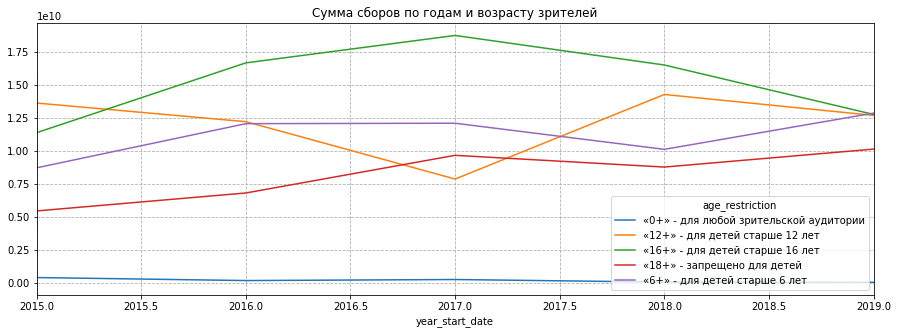

In [66]:
df[ df['box_office'].notna()]\
    .pivot_table(index= 'year_start_date',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum')\
    .plot(title='Сумма сборов по годам и возрасту зрителей', kind='line', xlim=[2015, 2019], figsize=(15, 5))

plt.grid(ls='--')
print()

<div class="alert alert-info"> 
    
Больше всего денег собрали фильмы для возраста "16+", пик в 2016 году. 
    
По аудитории "12+" наоборот, провал сборов в 2016 и подъём в 2018. 
    
Сборы с "18+" показали рост с 2015 по 2019 годы.


</div>

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [67]:
pd.options.mode.chained_assignment = None

df_help = df[df['refundable_support'].notna() | df['nonrefundable_support'].notna()]

df_help['full_support'] = df_help['nonrefundable_support'] + df_help['refundable_support']

df_help['profitability'] = df_help['box_office'] / df_help['full_support'] - 1

df_help['is_paid_off'] = df_help['profitability'] > 0

df_help['is_not_paid_off'] = ~df_help['is_paid_off']



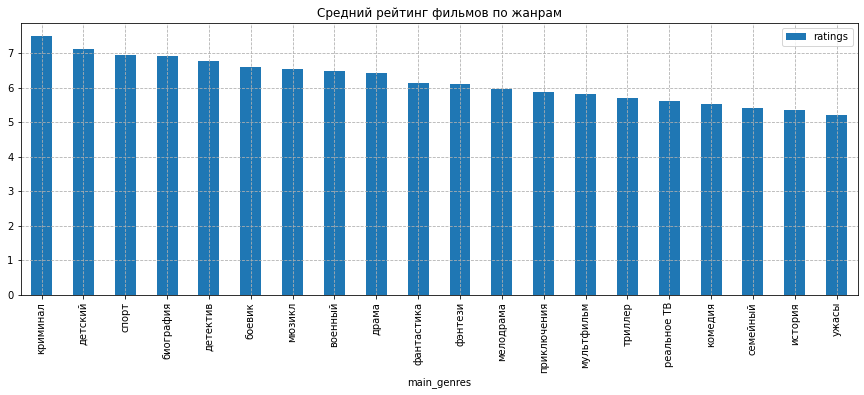

In [68]:
df_help[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Cредний рейтинг фильмов по жанрам', kind='bar', figsize=(15, 5))

plt.grid(ls='--')

<div class="alert alert-info"> 
    
Самые рейтинговые жанры - криминал, детский и спорт. 
    
Внизу рейтинга - ужасы, история и семейный. 


</div>

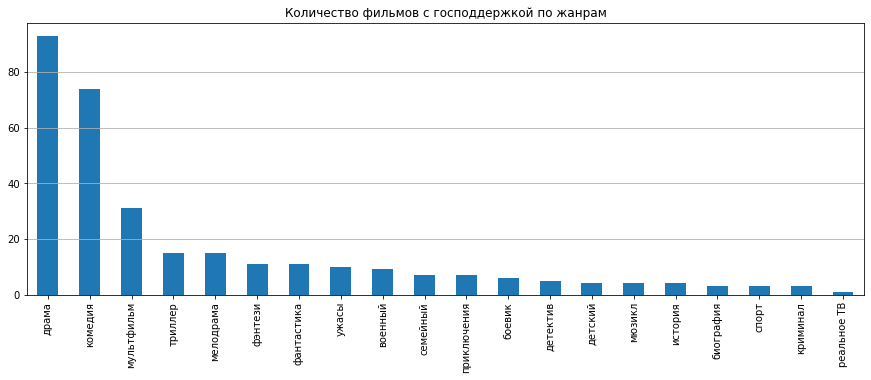

In [69]:
df_help['main_genres'].value_counts().plot(title='Количество фильмов с господдержкой по жанрам',\
                                           kind='bar', figsize=(15, 5))

plt.grid(axis="y")

<div class="alert alert-info"> 
    
Высокая господдержка у жанров - драма, комедия и мультфильм. Низкая - реальное ТВ, криминал, спорт.

</div>

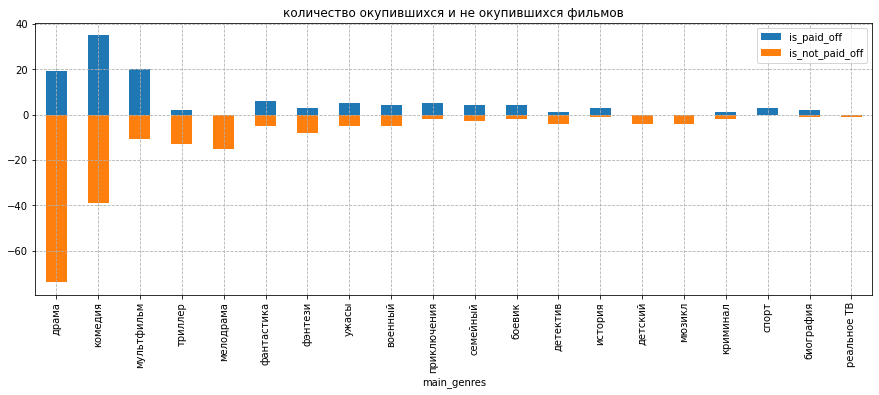

In [70]:
df_help.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'],
                  figsize=(15, 5))

plt.grid(ls='--')

<div class="alert alert-info"> 
    
Окупаемость у фильмов с господдержкой низкая, особенно в жанрах драма и комедия.


</div>

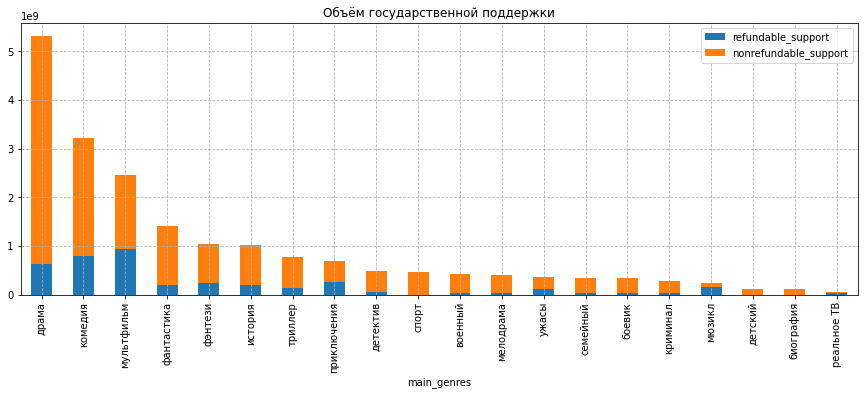

In [71]:
df_help.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                  figsize=(15, 5))

plt.grid(ls='--')

<div class="alert alert-info"> 
    
Объём государственной поддержки составляет основную часть бюджета в жанрах - драма, комедия, мультфильмы и фантастика.


</div>
 

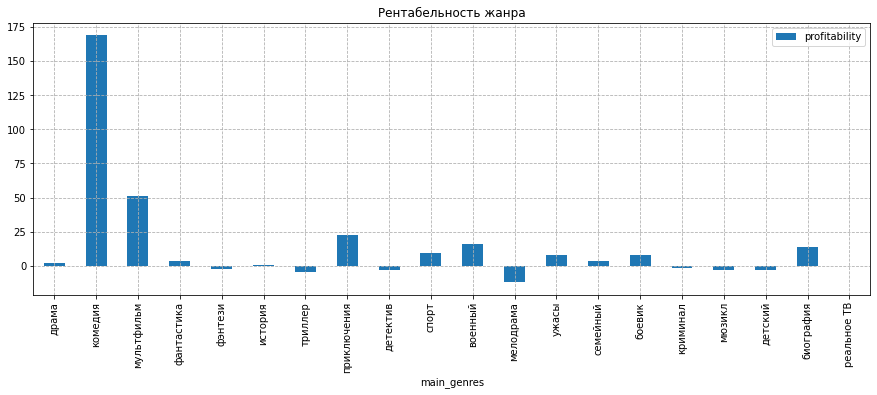

In [72]:
df_help.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Рентабельность жанра',
                  kind='bar',
                  stacked=True,
                  y='profitability', figsize=(15, 5))

plt.grid(ls='--')

<div class="alert alert-info"> 
    
**Рентабельнось жанра:** 
    

лидируют - комедия (с большим отрывом), мультфильм и приключения, 
    
аутсайдеры - мелодрама, триллер и детектив.
    



</div>

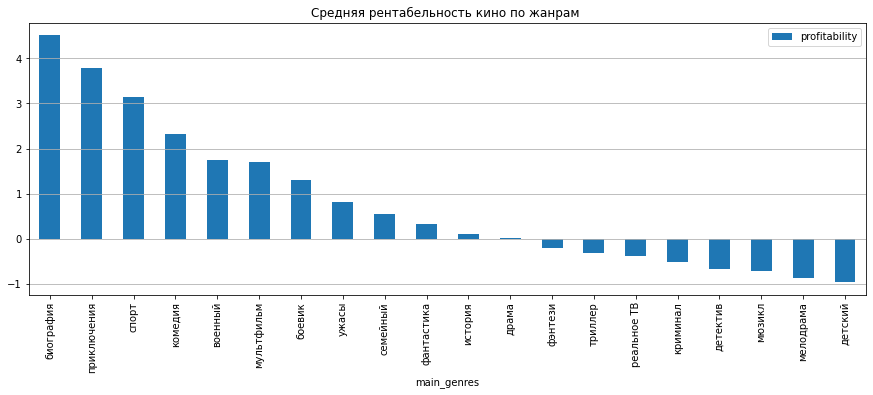

In [73]:
df_help.groupby('main_genres') \
            .agg('mean') \
            .sort_values(by='profitability',
                         ascending=False) \
            .plot(title='Cредняя рентабельность кино по жанрам ',
                  kind='bar',
                  stacked=True,
                  y='profitability', figsize=(15, 5))

plt.grid(axis="y")

<div class="alert alert-info"> 
    
**Средняя рентабельнось по жанрам:** 
    

Максимальная - биография, приключения и спорт, 
    
убыточны - детский, мелодрама и детектив.
    

</div>

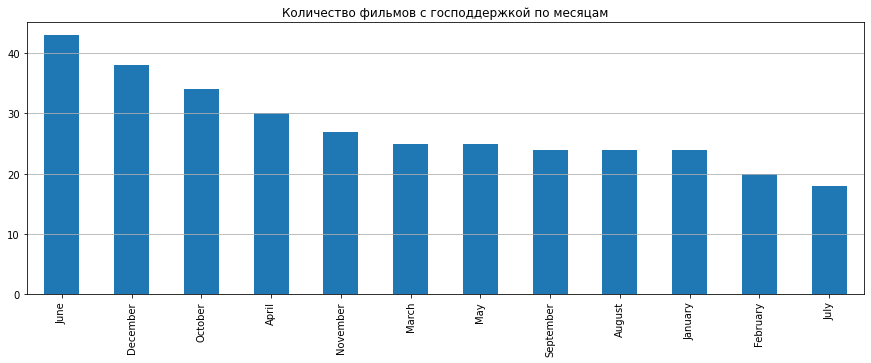

In [74]:
df_help['month_start_date'].value_counts().plot(title='Количество фильмов с господдержкой по месяцам',\
                                           kind='bar', figsize=(15, 5))

plt.grid(axis="y")

<div class="alert alert-info"> 
    
**Количество фильмов с господдержкой по месяцам:** 
    

Максимальное - в июне и декабре, 
    
минимальное - в феврале и июле.
    

</div>

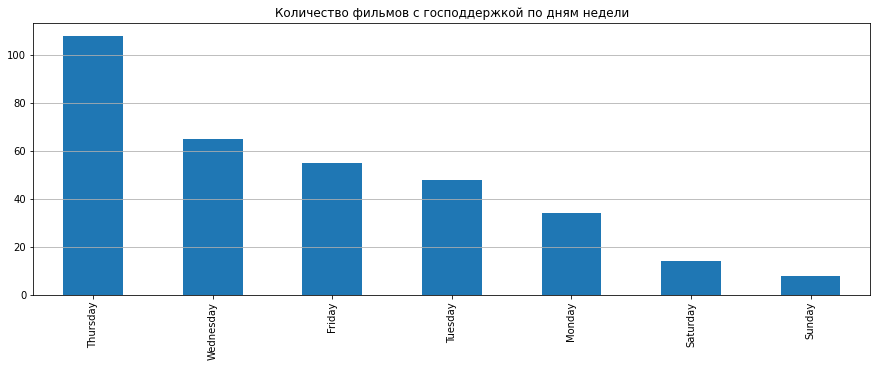

In [75]:
df_help['day_start_date'].value_counts().plot(title='Количество фильмов с господдержкой по дням недели',\
                                           kind='bar', figsize=(15, 5))

plt.grid(axis="y")

<div class="alert alert-info"> 
    
**Количество фильмов с господдержкой по дням:** 
    

Максимальное - вторник и среда, 
    
минимальное - суббота и воскресенье.
    

</div>

### Шаг 5. Общий вывод

<div class="alert alert-info", style="border:solid coral 3px; padding: 20px"> 

1. Доля участия государства в бюджете составляет - 61%
    
    
2. С 2010 года динамика проката идёт вверх по нарастающей. Пик приходится на 2016 год, затем небольшой спад и снова подъем в 2019 году до уровня 2016 года.
    
    
3. Минимальной сумма кассовых сборов была в 2010-2013 годах, максимальной - в 2017 году.
    
   
4. Больше всего денег собрали фильмы для возраста **"16+"**, пик в 2016 году. По аудитории **"12+"** наоборот, провал сборов в 2016 и подъём в 2018. Сборы с **"18+"** показали рост с 2015 по 2019 годы.   
    
    
5. Самые рейтинговые жанры - криминал, детский и спорт. Внизу рейтинга - ужасы, история и семейный.
    
    
6. Объём государственной поддержки максимальный в жанрах - драма, комедия, мультфильмы и фантастика. Низкая - реальное ТВ, криминал, спорт.
    
    
  
7. Окупаемость у фильмов с господдержкой низкая, особенно в жанрах драма и комедия.
    
    
    
***Насколько фильмы с господдержкой интересны зрителю?***
    
**Рентабельнось жанра:** 
    
    

♦ Лидеры - комедия (с большим отрывом), мультфильм и приключения, 
    
♦ аутсайдеры - мелодрама, триллер и детектив. 
    
    
    
**Средняя рентабельнось по жанрам:** 
    
    

♦ Максимальная - биография, приключения и спорт, 
    
♦ Убыточны - детский, мелодрама и детектив.    
    
    

**Количество фильмов с господдержкой по месяцам:** 
    
    

♦ Максимальное - в июне и декабре, 
    
♦ минимальное - в феврале и июле.
    

    
**Количество фильмов с господдержкой по дням:** 
    
    

♦ Максимальное - вторник и среда, 
    
♦ Минимальное - суббота и воскресенье.

</div>